In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import root_pandas
import pandas as pd
import uproot
import numpy as np
from scipy import stats

Welcome to JupyROOT 6.20/04


In [3]:
file = uproot.open("dataUpsilon4S/Upsilon4S_seed20393.root")
tree = file["tree"]

In [4]:
TPCSimHits = pd.DataFrame({subbranch: tree[f"TPCSimHits.{subbranch}"].array().content for subbranch in ["m_pdg", "m_x", "m_y", "m_z"]})
TPCSimHits

,m_pdg,m_x,m_y,m_z
0,211,-28.290298,34.847512,-4.579521
1,211,-28.290361,34.847621,-4.579534
2,211,-28.363820,34.973113,-4.594374
3,211,-28.365561,34.976091,-4.594726
4,211,-28.363131,34.971935,-4.594235
...,...,...,...,...
168923,11,30.522555,-38.990760,-18.245775
168924,11,30.522720,-38.991037,-18.244882
168925,11,30.522926,-38.991381,-18.243769
168926,11,30.522933,-38.991393,-18.243732


In [5]:
TPCElectronSimHits = TPCSimHits[TPCSimHits['m_pdg']==11]
TPCElectronSimHits

,m_pdg,m_x,m_y,m_z
4018,11,-47.910673,96.978332,-11.297925
4019,11,-47.910569,96.978348,-11.297937
4020,11,-47.909776,96.978472,-11.298025
4021,11,-47.911032,96.978275,-11.297886
4022,11,-47.910458,96.978365,-11.297949
...,...,...,...,...
168923,11,30.522555,-38.990760,-18.245775
168924,11,30.522720,-38.991037,-18.244882
168925,11,30.522926,-38.991381,-18.243769
168926,11,30.522933,-38.991393,-18.243732


In [6]:
TPCDigits = pd.DataFrame({subbranch: tree[f"TPCDigits.{subbranch}"].array().content for subbranch in ["m_xReal", "m_yReal", "m_zReal", "m_useDigitInTracking", "m_xReco", "m_yReco", "m_zReco"]})
TPCDigits['cellID'] = ((TPCDigits['m_xReal']+128)/2).astype(int) + 128*((TPCDigits['m_yReal']+128)/2).astype(int)
TPCDigits

,m_xReal,m_yReal,m_zReal,m_useDigitInTracking,m_xReco,m_yReco,m_zReco,cellID
0,-28.291626,34.844660,-4.403665,True,-28.2925,34.8425,-4.5800,10417
1,-28.314106,34.909399,-4.704392,True,-28.3125,34.9075,-4.7725,10417
2,-28.325621,34.981197,-4.626830,True,-28.3275,34.9825,-4.7725,10417
3,-28.326841,34.948609,-4.599143,True,-28.3275,34.9475,-4.7725,10417
4,-28.302249,34.990370,-4.690547,True,-28.3025,34.9925,-4.7725,10417
...,...,...,...,...,...,...,...,...
168850,30.487321,-39.016545,-17.920926,True,30.4875,-39.0175,-18.0550,5711
168851,30.530098,-38.965275,-18.195827,True,30.5325,-38.9675,-18.2475,5711
168852,30.590227,-38.911320,-18.266786,True,30.5925,-38.9125,-18.4400,5711
168853,30.569803,-38.986169,-18.363494,True,30.5675,-38.9875,-18.4400,5711


In [7]:
counts = (TPCDigits['cellID'].value_counts())
#for row in counts:
#    print(row)
counts
#len(TPCDigits[TPCDigits['cellID']==10528])

10528    45633
7774     10974
2366      5640
9303      3566
10529     3463
         ...  
6234         1
14658        1
6312         1
11438        1
5797         1
Name: cellID, Length: 519, dtype: int64

In [8]:
counts.index[counts > 5000].tolist()

[10528, 7774, 2366]

In [9]:
def plot_xyprojection(xdata, ydata, hitcolor, hitlabel, hitsize=0.001, savebool=True, savename='projectionplot.pdf', xlimlow=0.0, xlimup=0.0, ylimlow=0.0, ylimup=0.0, legendloc=2):
    fig, ax = plt.subplots()
    x = xdata
    y = ydata
    
    circle1 = plt.Circle((0, 0), 44.85, color='black', fill=False, ls='--', lw=0.75, label='TPC cage')
    circle2 = plt.Circle((0, 0), 109.4, color='black', fill=False, ls='--', lw=0.75)
    
    tpchits = ax.scatter(x, y, marker='.', s = hitsize, color=hitcolor , label=hitlabel)
    ax.set_xlabel('$x$ / cm', fontsize=25)
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    ax.set_ylabel('$y$ / cm', fontsize=25)
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))
    if xlimlow and xlimup:
        ax.set_xlim(xlimlow, xlimup)
    if ylimlow and ylimup:
        ax.set_ylim(ylimlow, ylimup)
    
    ax.set_aspect('equal')
    ax.tick_params(labelsize=25)
    
    tpccircle = ax.add_artist(circle1)
    ax.add_artist(circle2)
    
    fig.set_size_inches(10, 10)
    plt.title('Readout plane projection', fontsize=25)
    lgnd = plt.legend(handles=[tpchits, tpccircle],loc=legendloc, prop={'size':15})
    lgnd.legendHandles[0]._sizes = [35]
    fig.tight_layout()
    if savebool==True:
        plt.savefig(savename) 
    plt.show()
    plt.close()

In [10]:
def plot_sideprojection(zdata, sidedata, sidename,hitcolor, hitlabel, hitsize=0.001, savebool=True, savename='projectionplot.pdf', zlimlow=0.0, zlimup=0.0, sidelimlow=0.0, sidelimup=0.0):
    fig, ax = plt.subplots()
    x = zdata
    y = sidedata
    
    rect1 = plt.Rectangle((-83.12,44.85), 241.69, 64.55 ,linewidth=0.75,edgecolor='black',facecolor='none', ls='--', label='TPC cage')
    rect2 = plt.Rectangle((-83.12,-109.4), 241.69, 64.55 ,linewidth=0.75,edgecolor='black',facecolor='none', ls='--')
    
    tpchits = ax.scatter(x, y, marker='.', s = hitsize, color=hitcolor , label=hitlabel)
    ax.set_xlabel('$z$ / cm', fontsize=25)
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    ax.set_ylabel('$'+sidename+'$ / cm', fontsize=25)
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))
    if zlimlow and zlimup:
        ax.set_xlim(zlimlow, zlimup)
    if sidelimlow and sidelimup:
        ax.set_ylim(sidelimlow, sidelimup)
    
    ax.set_aspect('equal')
    ax.tick_params(labelsize=25)
    
    tpccage = ax.add_artist(rect1)
    ax.add_artist(rect2)
    
    fig.set_size_inches(10, 10)
    plt.title('Side View of TPC Volume', fontsize=25)
    #lgnd = plt.legend(handles=[tpchits, tpccage],loc=2, prop={'size':15})
    #lgnd.legendHandles[0]._sizes = [35]
    fig.tight_layout()
    if savebool==True:
        plt.savefig(savename) 
    plt.show()
    plt.close()

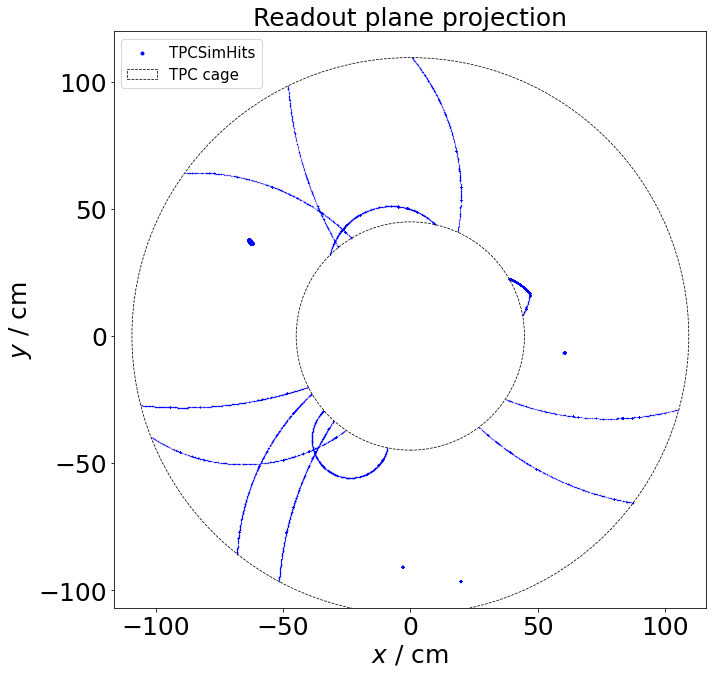

In [28]:
plot_xyprojection(TPCSimHits['m_x'], TPCSimHits['m_y'], hitcolor='blue', hitlabel='TPCSimHits', savebool=True, savename='Upsilon4S_seed20393.pdf')

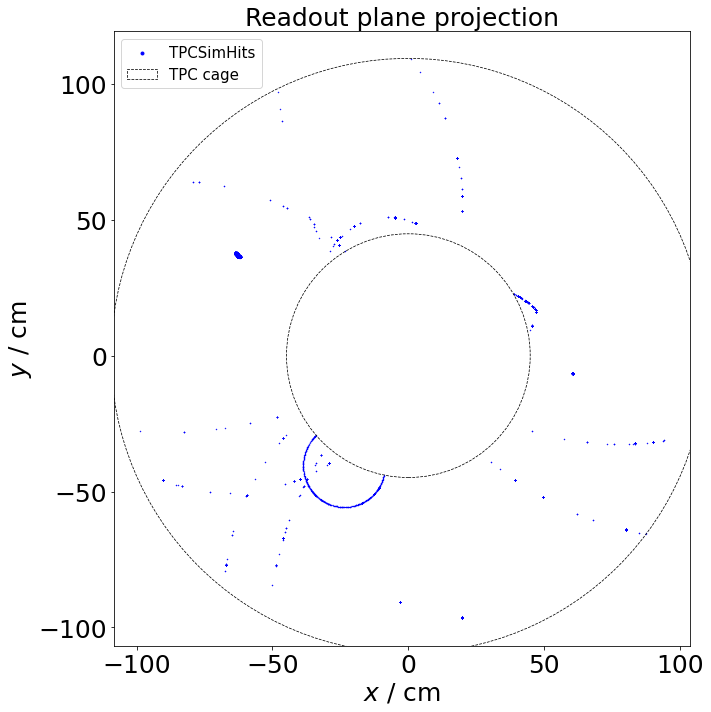

In [12]:
plot_xyprojection(TPCElectronSimHits['m_x'], TPCElectronSimHits['m_y'], hitcolor='blue', hitlabel='TPCSimHits')

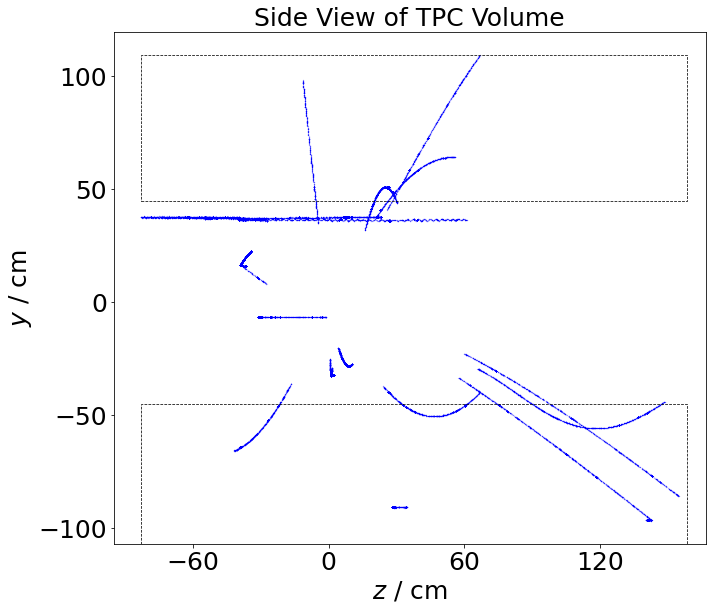

In [13]:
plot_sideprojection(TPCSimHits['m_z'], TPCSimHits['m_y'], 'y', hitcolor='blue', hitlabel='TPCSimHits', savebool=True, savename='Upsilon4S_seed20393_sideview.pdf')

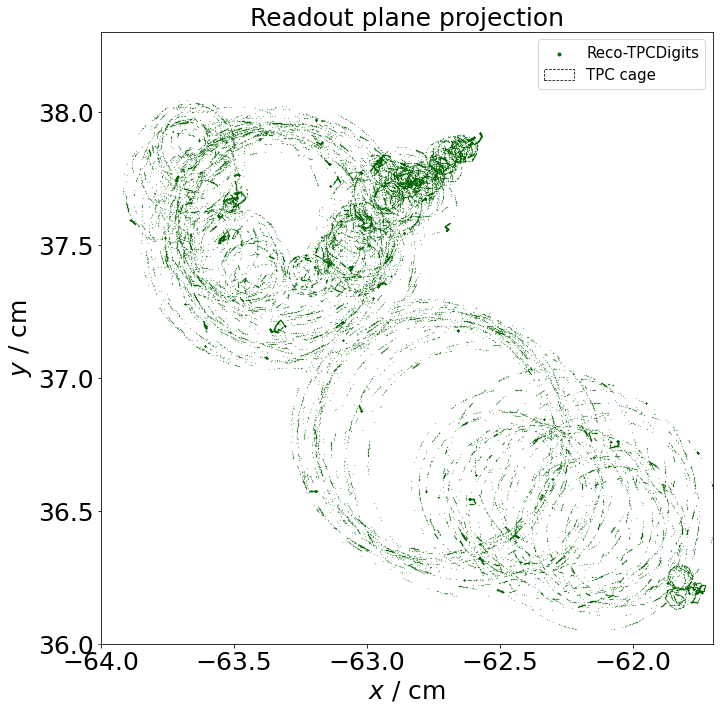

In [14]:
plot_xyprojection(TPCElectronSimHits['m_x'], TPCElectronSimHits['m_y'], hitcolor='darkgreen', hitlabel='Reco-TPCDigits', hitsize=0.1, savebool=False, savename='corkscrew_RecoDigit.pdf', ylimlow=36, ylimup=38.3, xlimlow=-64, xlimup=-61.7, legendloc=1)

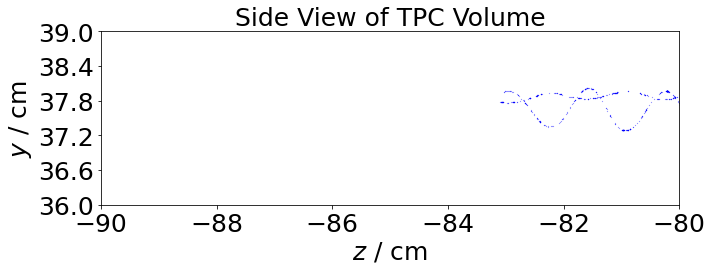

In [15]:
plot_sideprojection(TPCElectronSimHits['m_z'], TPCElectronSimHits['m_y'], 'y', hitcolor='blue', hitsize=0.1, hitlabel='TPCSimHits', sidelimlow=36, sidelimup=39, zlimlow=-90, zlimup=-80)

In [16]:
def plot_bkgrejection(xdata, ydata, cellIDs, hitcolor, hitlabel, hitsize=0.001, savebool=False, savename='projectionplot.pdf', xlimlow=-128.0, xlimup=128.0, ylimlow=-128.0, ylimup=128.0):
    fig, ax = plt.subplots()
    x = xdata
    y = ydata    
    
    circle1 = plt.Circle((0, 0), 44.85, color='black', fill=False, ls='--', lw=0.75, label='TPC cage')
    circle2 = plt.Circle((0, 0), 109.4, color='black', fill=False, ls='--', lw=0.75)
    
    for i in range(-128,128):
        ax.axhline(i*2, lw=0.5, color='grey')
        ax.axvline(i*2, lw=0.5, color='grey')
        
    for j in cellIDs:
        rect = plt.Rectangle(((j%128)*2-128, int(j/128)*2-128), 2, 2 ,linewidth=0.001,edgecolor='none',facecolor='darkred', alpha=0.5, ls='--', label='Rejected Cells')
        rejects = ax.add_artist(rect)

    #rect1 = plt.Rectangle(((16383%128)*2-128, int(16383/128)*2-128), 2, 2, linewidth=0.001, edgecolor='none', facecolor='darkred', alpha=0.5)
    #ax.add_artist(rect1)
    
    
    tpchits = ax.scatter(x, y, marker='.', s = hitsize, color=hitcolor , label=hitlabel)
    ax.set_xlabel('$x$ / cm', fontsize=30)
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    ax.set_ylabel('$y$ / cm', fontsize=30)
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))
    if xlimlow and xlimup:
        ax.set_xlim(xlimlow, xlimup)
    if ylimlow and ylimup:
        ax.set_ylim(ylimlow, ylimup)
    
    ax.set_aspect('equal')
    ax.tick_params(labelsize=30)
    
    tpccircle = ax.add_artist(circle1)
    ax.add_artist(circle2)
    
    fig.set_size_inches(12.8, 12.8)
    plt.title('Rejection of corkscrew/background hits', fontsize=30)
    lgnd = plt.legend(handles=[tpchits, tpccircle, rejects],loc=2, prop={'size':15})
    lgnd.legendHandles[0]._sizes = [35]
    fig.tight_layout()
    if savebool==True:
        plt.savefig(savename) 
    plt.show()
    plt.close()

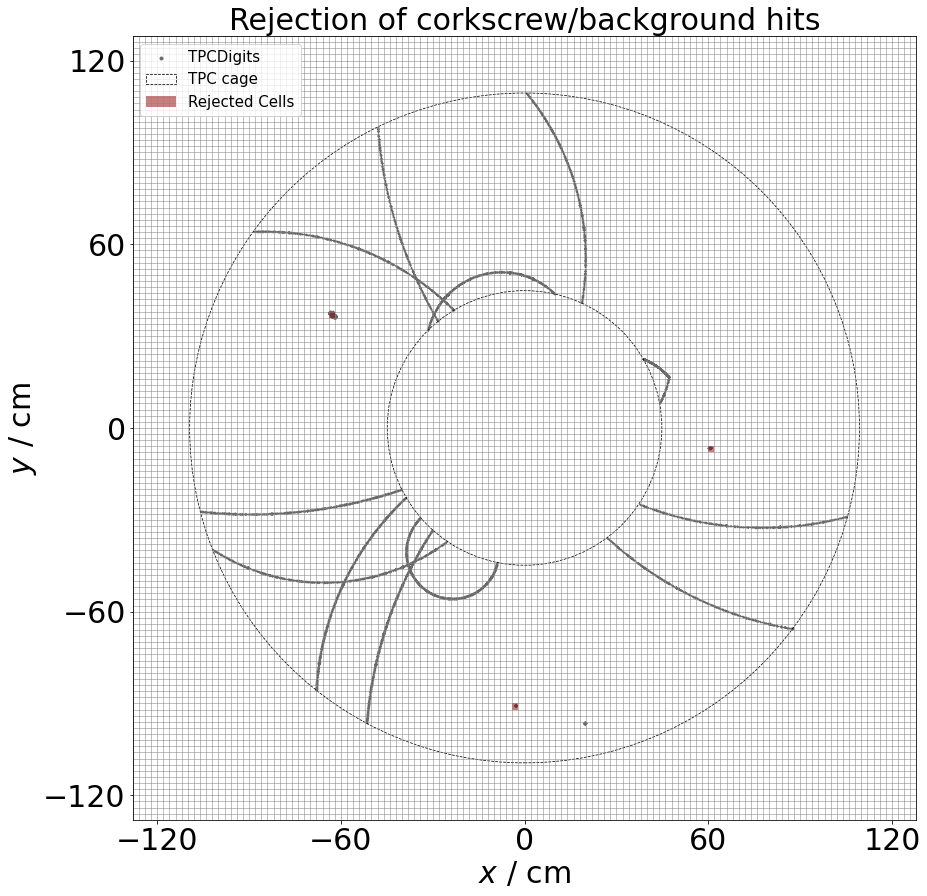

In [17]:
counts = (TPCDigits['cellID'].value_counts())
rejects = counts.index[counts > 5000].tolist()


plot_bkgrejection(TPCDigits['m_xReal'], TPCDigits['m_yReal'], rejects, hitcolor='dimgrey', hitlabel='TPCDigits', hitsize=0.1, savebool=True, savename='corkscrew_rejection.pdf')#, xlimlow=-65, xlimup=-61, ylimlow=35, ylimup=39)

In [26]:
def plot_sidebkgrejection(zdata, sidedata, cellIDs, sidename, hitcolor, hitlabel, hitsize=0.001, savebool=False, savename='projectionplot.pdf', zlimlow=0.0, zlimup=0.0, sidelimlow=-128.0, sidelimup=128.0):
    fig, ax = plt.subplots()
    x = zdata
    y = sidedata
    
    rect1 = plt.Rectangle((-83.12,44.85), 241.69, 64.55 ,linewidth=0.75,edgecolor='black',facecolor='none', ls='--', label='TPC cage')
    rect2 = plt.Rectangle((-83.12,-109.4), 241.69, 64.55 ,linewidth=0.75,edgecolor='black',facecolor='none', ls='--')
    
    #for i in range(-128,128):
     #   ax.axhline(i*2, lw=0.25, color='grey')
        
    
    for j in cellIDs:
        if sidename=='x':
            rect = plt.Rectangle((-83.12, (j%128)*2-128), 241.69, 2 ,linewidth=0.001,edgecolor='none',facecolor='darkred', alpha=0.5, ls='--', label='Rejected Cells')
        elif sidename=='y':
            rect = plt.Rectangle((-83.12, int(j/128)*2-128), 241.69, 2 ,linewidth=0.001,edgecolor='none',facecolor='darkred', alpha=0.5, ls='--', label='Rejected Cells')
        rejects = ax.add_artist(rect)
    
    tpchits = ax.scatter(x, y, marker='.', s = hitsize, color=hitcolor , label=hitlabel)
    ax.set_xlabel('$z$ / cm', fontsize=25)
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    ax.set_ylabel('$'+sidename+'$ / cm', fontsize=25)
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))
    if zlimlow and zlimup:
        ax.set_xlim(zlimlow, zlimup)
    if sidelimlow and sidelimup:
        ax.set_ylim(sidelimlow, sidelimup)
    
    ax.set_aspect('equal')
    ax.tick_params(labelsize=25)
    
    tpccage = ax.add_artist(rect1)
    ax.add_artist(rect2)
    
    fig.set_size_inches(10, 10)
    plt.title('Side View of TPC Volume', fontsize=25)
    lgnd = plt.legend(handles=[tpchits, tpccage],loc=2, prop={'size':15})
    lgnd.legendHandles[0]._sizes = [35]
    fig.tight_layout()
    if savebool==True:
        plt.savefig(savename) 
    plt.show()
    plt.close()

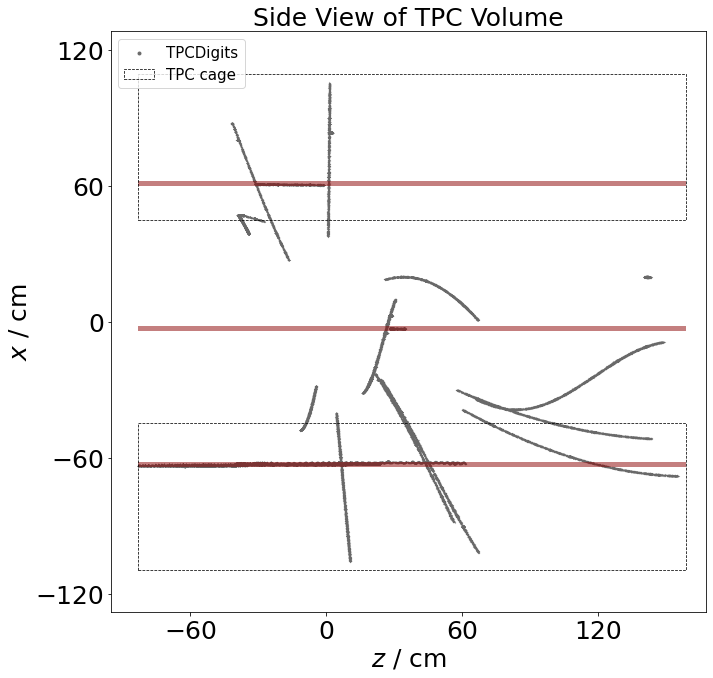

In [27]:
counts = (TPCDigits['cellID'].value_counts())
rejects = counts.index[counts > 5000].tolist()


plot_sidebkgrejection(TPCDigits['m_zReal'], TPCDigits['m_xReal'], rejects, sidename='x', hitcolor='dimgrey', hitlabel='TPCDigits', hitsize=0.1, savebool=False, savename='corkscrew_Rejection_side.pdf')#, xlimlow=-65, xlimup=-61, ylimlow=35, ylimup=39)

In [45]:
def plot_xyzprojection(xdata, ydata, zdata, hitcolor, hitlabel, hitsize=0.001, savebool=False, savename='projectionplot.pdf', xlimlow=0.0, xlimup=0.0, ylimlow=0.0, ylimup=0.0, legendloc=2):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x = xdata
    y = ydata
    z = zdata
    
    circle1 = plt.Circle((0, 0), 44.85, color='black', fill=False, ls='--', lw=0.75, label='TPC cage')
    circle2 = plt.Circle((0, 0), 109.4, color='black', fill=False, ls='--', lw=0.75)
    
    tpchits = ax.scatter(x, z, y, s=hitsize, marker='.',  color=hitcolor , label=hitlabel)
    ax.set_xlabel('$x$ / cm', fontsize=25)
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    ax.set_ylabel('$z$ / cm', fontsize=25)
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))
    ax.set_zlabel('$y$ / cm', fontsize=25)
    ax.zaxis.set_major_locator(plt.MaxNLocator(5))
    if xlimlow and xlimup:
        ax.set_xlim(xlimlow, xlimup)
    if ylimlow and ylimup:
        ax.set_ylim(ylimlow, ylimup)
    
    #ax.set_aspect('equal')
    ax.tick_params(labelsize=25)
    
    #tpccircle = ax.add_artist(circle1)
    #ax.add_artist(circle2)
    
    # Cylinder
    x=np.linspace(-44.85, 44.85, 1000)
    z=np.linspace(-83.12, 158.57, 1000)
    Xc, Zc=np.meshgrid(x, z)
    Yc = np.sqrt(44.85**2-Xc**2)

    # Draw parameters
    rstride = 20
    cstride = 10
    ax.plot_surface(Xc, Yc, Zc, alpha=0.2, rstride=rstride, cstride=cstride)
    ax.plot_surface(Xc, -Yc, Zc, alpha=0.2, rstride=rstride, cstride=cstride)
    
    fig.set_size_inches(10, 10)
    plt.title('Hits in the TPC Volume', fontsize=25)
    lgnd = plt.legend(handles=[tpchits],loc=legendloc, prop={'size':15})
    lgnd.legendHandles[0]._sizes = [35]
    fig.tight_layout()
    if savebool==True:
        plt.savefig(savename) 
    plt.show()
    plt.close()

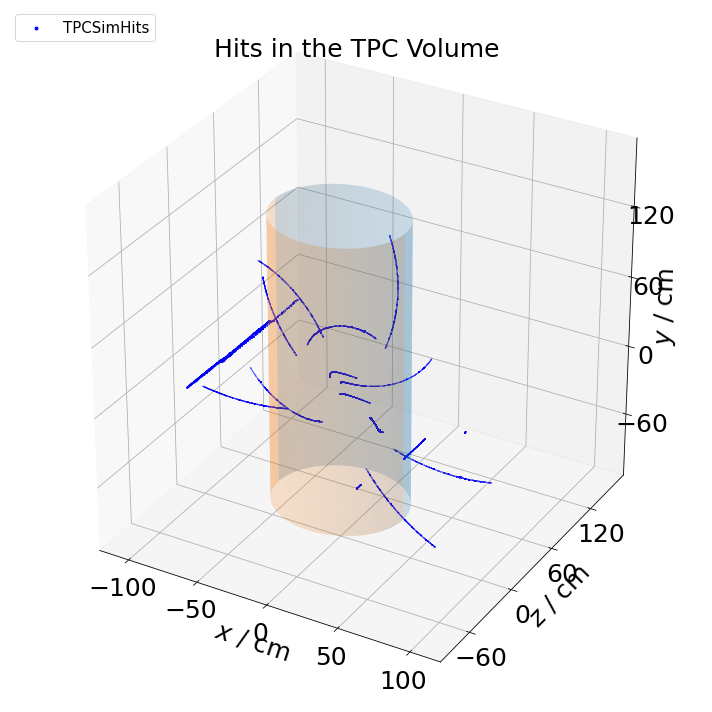

In [46]:
plot_xyzprojection(xdata=TPCSimHits['m_x'], ydata=TPCSimHits['m_y'], zdata=TPCSimHits['m_z'], hitsize=0.001, hitcolor='blue', hitlabel='TPCSimHits', savebool=False, savename='Upsilon4S_seed20393.pdf')

# Reading in the TPCTrackInfo

tracklength in mm

edep in MeV

momentum in MeV

In [20]:
TPCTrackInfos = pd.DataFrame({subbranch: tree[f"TPCTrackInfos.{subbranch}"].array().content for subbranch in ["m_pdg", "m_trackid", "m_tracklength", "m_edep", "m_momentum"]})
#TPCTrackInfos[(abs(TPCTrackInfos['m_pdg'])==motherpdg)]
#TPCTrackInfos[(abs(TPCTrackInfos['m_pdg'])==2212)]
TPCTrackInfos[(abs(TPCTrackInfos['m_pdg'])==motherpdg) & ((TPCTrackInfos['m_trackid']==8) | (TPCTrackInfos['m_trackid']==7) | (TPCTrackInfos['m_trackid']==6) | (TPCTrackInfos['m_trackid']==5))]
#TPCTrackInfos
#print(TPCTrackInfos.loc[1691:1750, :])

NameError: name 'motherpdg' is not defined

In [ ]:
TPCMissingPionEvt = TPCTrackInfos[1692:2364]
TPCMissingPionEvt = TPCMissingPionEvt[(abs(TPCMissingPionEvt['m_pdg'])!=11)]
TPCMissingPionEvt
#TPCTrackInfos[(TPCTrackInfos['m_trackid']>10600) & (TPCTrackInfos['m_trackid']<10613) ]
#TPCTrackInfos[TPCTrackInfos['m_trackid']==10611]

In [ ]:
file = uproot.open("dataBhabha/Bhabha_seed40790.root")
tree = file["tree"]

In [ ]:
TPCSimHits = pd.DataFrame({subbranch: tree[f"TPCSimHits.{subbranch}"].array().content for subbranch in ["m_pdg", "m_x", "m_y", "m_z"]})
TPCSimHits

In [ ]:
plot_xyprojection(TPCSimHits['m_x'], TPCSimHits['m_y'], hitcolor='blue', hitlabel='TPCSimHits', savebool=False, savename='Upsilon4S_seed20393.pdf')

In [ ]:
file = uproot.open("dataBhabha/Bhabha_seed28600.root")
tree = file["tree"]
TPCSimHits = pd.DataFrame({subbranch: tree[f"TPCSimHits.{subbranch}"].array().content for subbranch in ["m_pdg", "m_x", "m_y", "m_z"]})
TPCSimHits

In [ ]:
plot_sideprojection(TPCSimHits['m_z'], TPCSimHits['m_x'], 'x', hitcolor='blue', hitlabel='TPCSimHits', savebool=False, savename='Upsilon4S_seed20393_sideview.pdf')